# Data Analyst Associate Practical Exam Submission

## Vivendo Fast Food

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Background

Vivendo is a fast food chain in Brazil with over 200 outlets. <br>
Customers often claim compensation from the company for food poisoning. <br>
The legal team processes these claims. The legal team has offices in four locations. <br>
The legal team wants to improve how long it takes to reply to customers and close claims. <br>
The head of the legal department wants a report on how each location differs in the time it takes to close claims.

## Data Cleaning

In [1]:
# import the needed tools for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the dataset 
df = pd.read_csv('food_claims_2212.csv')
df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [3]:
# get the information about the data shape
df.shape

(2000, 8)

In [4]:
#get the full information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [5]:
#get the information on the number of null values in the dataset

df.isna().sum()

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

In [6]:
# we need to replace missing values in the `amount_paid` with the overall median of amount_paid

#Find the median of amount_paid

median_amount_paid = df['amount_paid'].median()
print(median_amount_paid)

20105.699999999997


In [7]:
#replace the null values in amount_paid with the median

df['amount_paid'] = df['amount_paid'].fillna(20105.70)

In [8]:
# We need to replace missing values in linked_cases with FALSE.

df['linked_cases'] = df['linked_cases'].fillna('FALSE')

In [9]:
# check to see if there are still null values

df.isna().sum()

claim_id                0
time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
dtype: int64

In [10]:
#check to see if location has the right details in the column

df.location.value_counts()

RECIFE       885
SAO LUIS     517
FORTALEZA    311
NATAL        287
Name: location, dtype: int64

In [11]:
# check to see if individuals_on_claim has the right details in the column
df.individuals_on_claim.value_counts()

12    156
2     156
8     154
7     152
3     150
9     142
4     142
13    139
11    137
5     137
10    135
6     123
14    121
15     99
1      57
Name: individuals_on_claim, dtype: int64

In [12]:
# check to see if cause has the right details in the column
df.cause.value_counts()

meat          943
unknown       713
vegetable     314
VEGETABLES     16
 Meat          14
Name: cause, dtype: int64

In [13]:
# clean the ' Meat' and 'VEGETABLES' to the right details

df['cause'] = df['cause'].replace(' Meat', 'meat')
df['cause'] = df['cause'].replace('VEGETABLES', 'vegetable')
df.cause.value_counts()

meat         957
unknown      713
vegetable    330
Name: cause, dtype: int64

In [14]:
# format the Brazilian dollar currency into the amount_paid column

def format_currency(amount_paid):
    return 'R$ {:,.2f}'.format(amount_paid)

In [15]:
df['amount_paid'] = df['amount_paid'].map(format_currency)

In [16]:
df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,"R$ 51,231.37",RECIFE,15,False,unknown
1,2,195,R$ 52137.83,"R$ 42,111.30",FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,"R$ 23,986.30",SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,"R$ 27,942.72",FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,"R$ 16,251.06",RECIFE,11,False,vegetable


## Task 1

For every column in the data:<br> a. State whether the values match the description given in the table above.<br> b. State the number of missing values in the column.<br>
c. Describe what you did to make values match the description if they did not match.

#### Dataset Description

The original dataset comprises of **2000** rows and **8** columns.

The values of the dataset matched the description given in the table except for the following tables:

1. The `amount_paid` column didn't have the Brazilian Dollar sign.
2. The `cause` column comprises of 14 rows with *Meat* instead of *meat*
3. The `cause` column comprises of 16 rows with *VEGETABLES* instead of *vegetable*.


#### Null values:
    
1. 36 null values in the `amount_paid` column
2. 26 null values in the `linked_cases` column
    

#### Cleaning:

1. The 36 null values in the `amount_paid` column were replaced with the median of the total `amount_paid` as stated in the instruction.
2. The 26 null values in the `linked_cases` column were replaced with FALSE as stated in the instruction.
3. The 14 rows with *Meat* in the `cause` column were replaced with the actual word *meat*.
4. The 16 rows with *VEGETABLES* in the `cause` column were replaced with the actual word *vegetable*.
5. The Brazilian dollar sign was formatted into the `amount_paid` column

## Task 2

Create a visualization that shows the number of claims in each location.

Use the visualization to:

a. State which category of the variable location has the most observations.

b. Explain whether the observations are balanced across categories of the variable location.

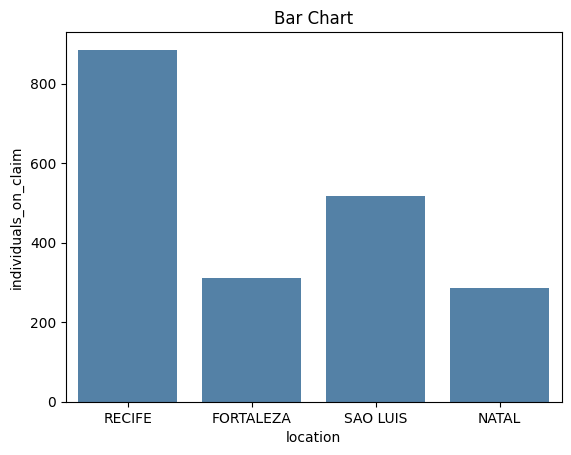

In [21]:
bar_color = 'steelblue'
sns.countplot(data=df, x='location', color=bar_color)

plt.xlabel('location')
plt.ylabel('individuals_on_claim')
plt.title('Bar Chart')

plt.show()

#### State which category of the variable location has the most observations.

We can clearly see from the vizualization that **Recife** has the highest individual claims count with over 800+ claims.

#### Explain whether the observations are balanced across categories of the variable location.


The observations are not balanced across the locations with **Recife** almost double of the 2nd highest location which is **Sao Luis**, and **Sao Luis** is also double of both **Fortaleza** and **Natal**.

## Task 3

Describe the distribution of time to close for all claims. Your answer must include a visualization that shows the distribution.

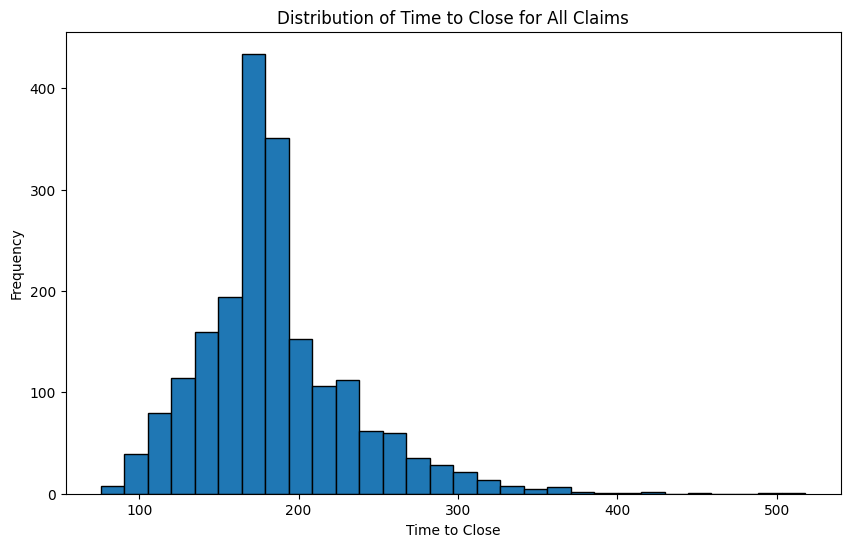

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(df['time_to_close'], bins=30, edgecolor='black')
plt.xlabel('Time to Close')
plt.ylabel('Frequency')
plt.title('Distribution of Time to Close for All Claims')
plt.show()

The distribution of `time_to_close` for all claims is a normal distribution which means that the mean, median and mode have close values and they are all located at the center or peak of the distribution.

## Task 4

Describe the relationship between time to close and location. Your answer must include a visualization to demonstrate the relationship.

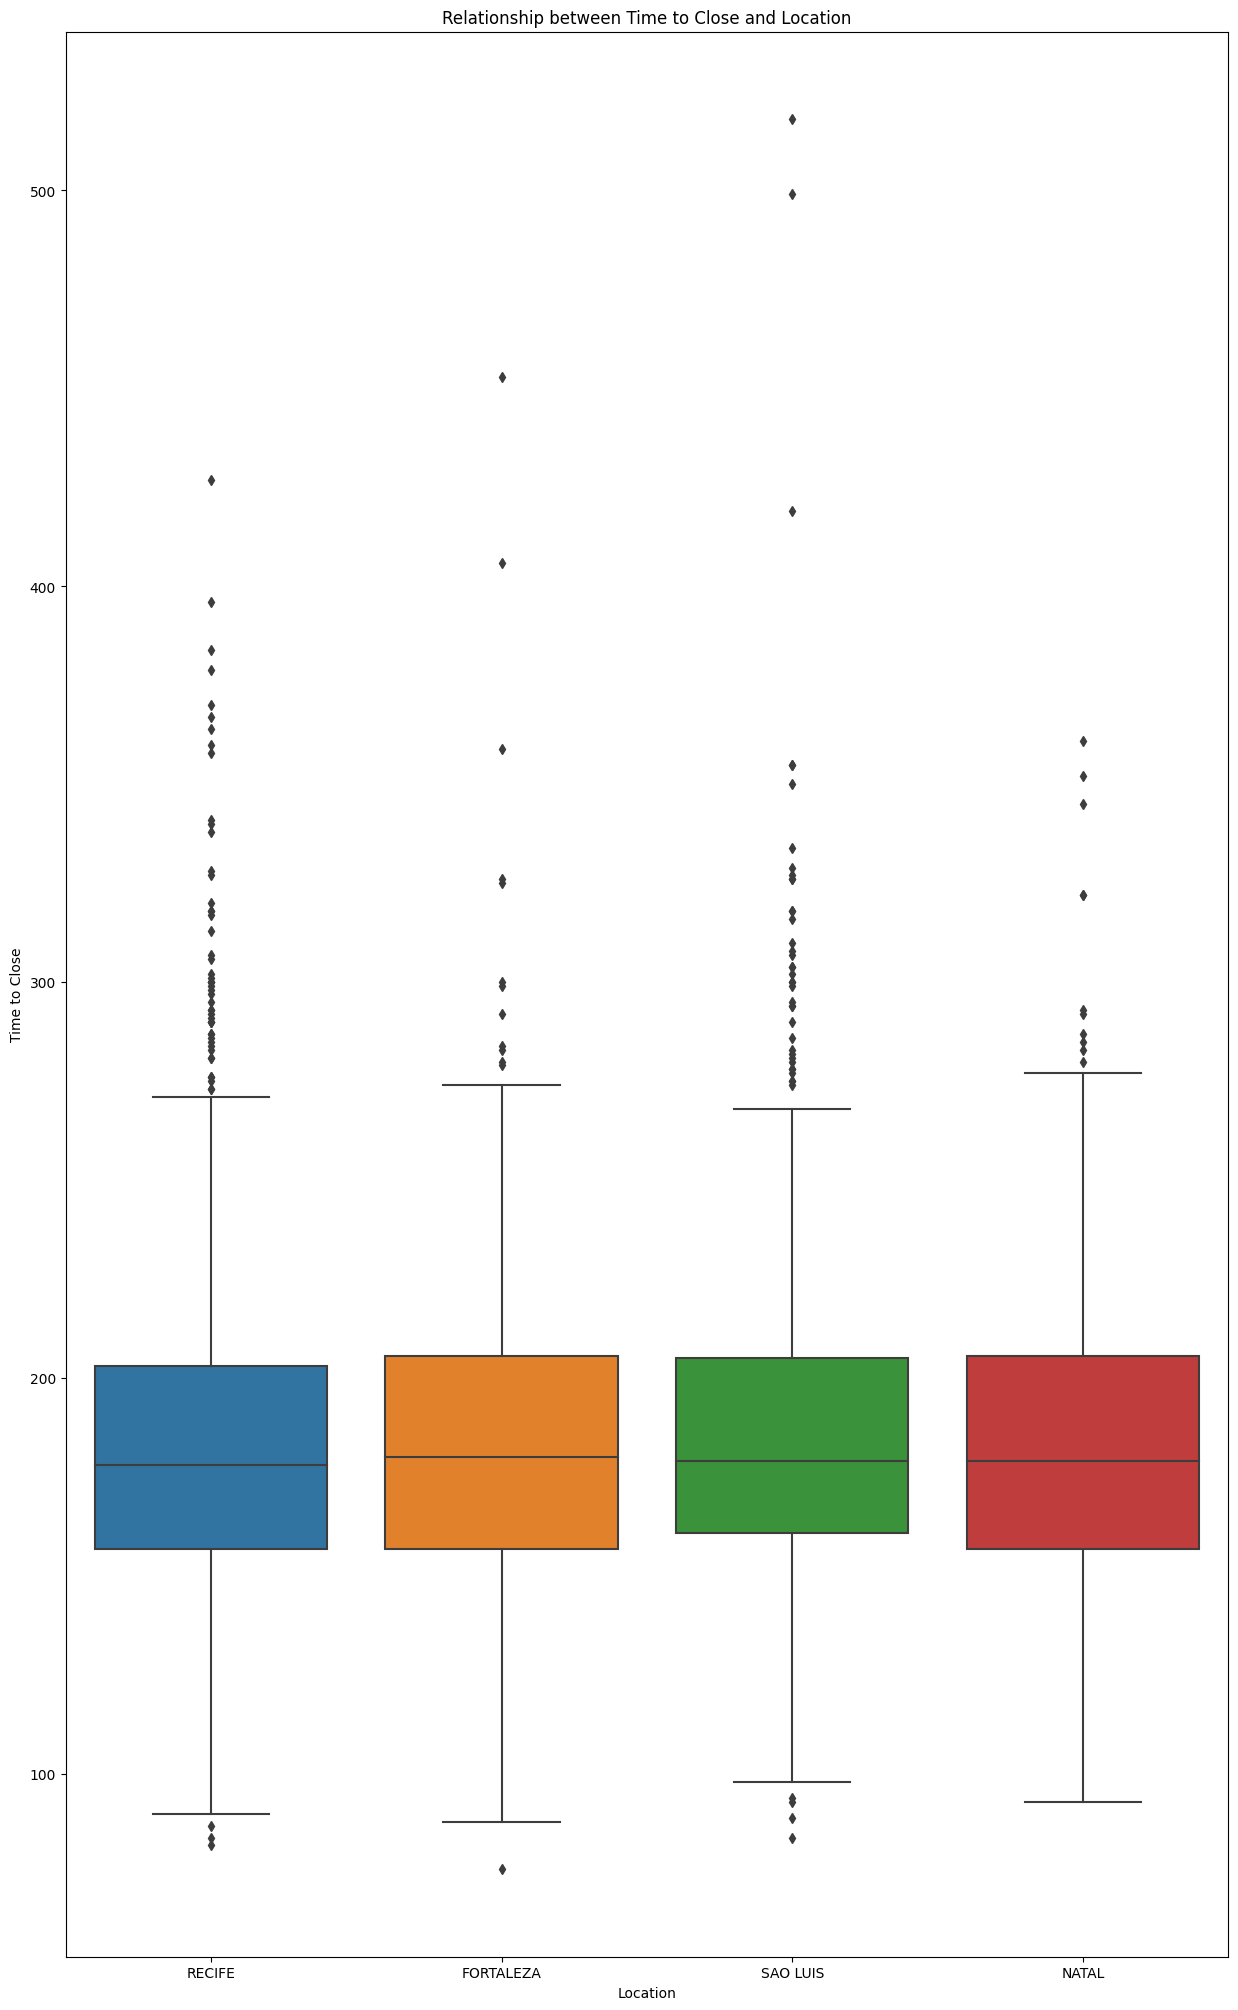

In [47]:
plt.figure(figsize=(15, 25))
sns.boxplot(data=df, x='location', y='time_to_close')
plt.xlabel('Location')
plt.ylabel('Time to Close')
plt.title('Relationship between Time to Close and Location')
plt.show()

From my observation from the boxplot, all the locations have very close `time_to_close` mean, first and third quartile.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam